In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import segyio

In [1]:
!pip -q install segyio

In [3]:
import sys
sys.path.append('D:/Programing/computational-geophysics/seismic')
from seistool import *

In [11]:
avoA = openSegy3D('D:/Programing/computational-geophysics/seismic/avo_a.sgy', iline=1,xline=9)

Successfully read 

Inline range from 2171 to 2501
Crossline range from 6005 to 6533
TWT from 0.0 to 3000.0
Sample rate: 4.0 ms
Survey rotation: 1.02 deg


In [12]:
avoB = openSegy3D('D:/Programing/computational-geophysics/seismic/avo_b.sgy', iline=1,xline=9)

Successfully read 

Inline range from 2171 to 2501
Crossline range from 6005 to 6533
TWT from 0.0 to 3000.0
Sample rate: 4.0 ms
Survey rotation: 1.02 deg


In [59]:
# Add TWT with time lag 1800 ms
avoA.twt = avoA.twt 
avoB.twt = avoB.twt 

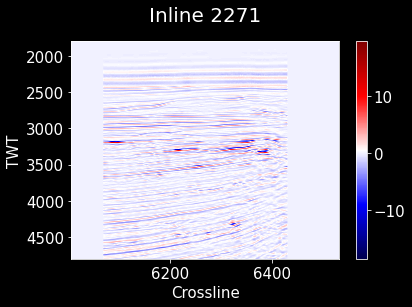

In [30]:
sliceCube(avoA, 'il', inline_loc=2271, display=True, 
          cmap='seismic')

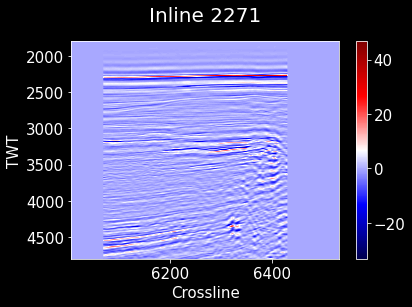

In [31]:
sliceCube(avoB, 'il', inline_loc=2271, display=True, 
          cmap='seismic')

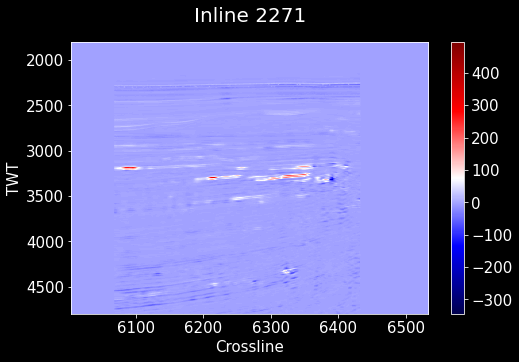

In [60]:
avoAB = avoA.data * avoB.data

avoAB = cube_constructor(avoAB, avoA.inlines, avoA.crosslines, avoA.twt)
sliceCube(avoAB, 'il', inline_loc=2271, display=True, 
          cmap='seismic', figsize=(8,5))

Text(0.5, 1.0, 'AVO A*B (XL 9320)')

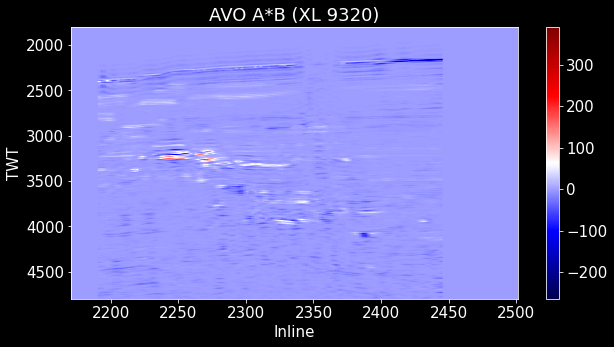

In [61]:
sliceCube(avoAB, 'xl', xline_loc=6351, display=True, 
          cmap='seismic', figsize=(10,5))
plt.title('AVO A*B (XL 9320)')

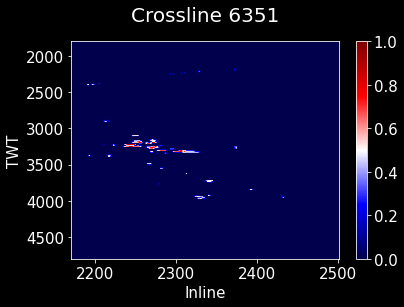

In [62]:
p = avoAB.data.copy()
p[(p>50)] = 1
p[p!=1] = 0

p = cube_constructor(p, avoA.inlines, avoA.crosslines, avoA.twt)
sliceCube(p, 'xl', xline_loc=6351, display=True, cmap='seismic')

In [63]:
def extract_geobody(cube, value, range_x, range_y, range_z, 
                    figsize=(10,15), elev=90, azim=-90, title='Geobody'):
  """
  Extract geobody from an attribute cube

  INPUT:

  cube: Attribute cube object (3D array)
  value: Threshold value of attribute
  range_x: Min and max of x coordinate (Tuple)
  range_y: Min and max of y coordinate (Tuple)
  range_z: Min and max of z coordinate or TWT (Tuple)
  elev, azim: Viewing elevation and azimuth

  OUTPUT: 
  
  Plot of extracted geobodies
  """
  data = cube.copy()
  cube[cube>value] = 1
  cube[cube!=1] = 0
  # cube = np.swapaxes(cube, 1, 0)
  nx, ny, nz = cube.shape
  cube = np.array(cube, dtype=bool)

  x = np.linspace(range_x[0], range_x[1], nx+1)
  y = np.linspace(range_y[0], range_y[1], ny+1)
  z = np.linspace(range_z[0], range_z[1], nz+1)
  x, y, z = np.meshgrid(y, x, z) 

  colors = plt.cm.plasma(data)

  xw = np.full(50, 2171)
  yw = np.full(50, 6005)
  zw = np.linspace(t0, t1, 1)  

  def make_ax(grid=False):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection='3d')
    ax.set_title(title, pad=20)
    ax.set_xlabel("X", labelpad=20)
    ax.set_ylabel("Y", labelpad=20)
    ax.set_zlabel("TWT", labelpad=20)
    ax.grid(grid)
    ax.invert_zaxis()
    # ax.view_init(60,45)
    ax.view_init(elev, azim)
    return ax

  ax = make_ax(True)
  ax.voxels(x, y, z, cube, facecolor='lime', shade=False, edgecolors='k', linewidth=0.2)
  # ax.plot(yw, xw, zw, lw=10)
  plt.show()

In [75]:
# Index to cut
id_il0, id_il1 = 0, 11*7
id_xl0, id_xl1 = 0, 143 # 11*4, 11*13
id_t0, id_t1 = 200,580  

# Cut locations
il0, il1 = avoA.inlines[id_il0], avoA.inlines[id_il1]
xl0, xl1 = avoA.crosslines[id_xl0], avoA.crosslines[id_xl1]
t0, t1 = avoA.twt[id_t0], avoA.twt[id_t1]

# x = np.full(50, 3066)
# y = np.full(50, 9380)
# z = np.linspace(t0, t1, 50)

# Cut seismic data
data2 = avoAB.data.copy()
data2 = data2[id_il0:id_il1,id_xl0:id_xl1,id_t0:id_t1]

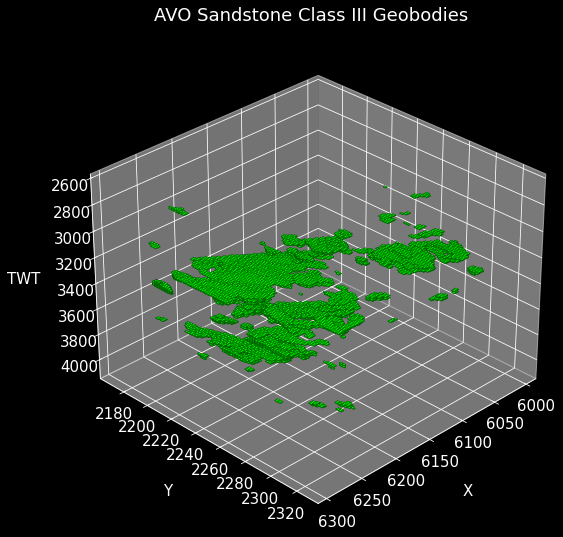

In [78]:
# AVO A*B threshold
thres = 50

# Visualize geobodies
plt.rcParams['font.size'] = 15
plt.style.use('dark_background')

extract_geobody(data2, thres, (il0,il1), (xl0,xl1), (t0,t1), 
                figsize=(20,9), azim=45, elev=30, 
                title='AVO Sandstone Class III Geobodies')

In [79]:
np.save('geobody.npy', data2)

In [4]:
geobody = np.load('D:/Programing/computational-geophysics/seismic/geobody.npy')

In [82]:
!pip -q install vedo

In [14]:
maxes = np.max(geobody,axis=2)
mins = np.min(geobody,axis=0)
print(maxes)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from vedo import *

In [ ]:
vol = Volume(geobody)
lego = vol.legosurface(vmin=30)

plt = show(lego, axes=1, backend='ipyvtk')
plt